# Final Project: League of Legends Match Predictor

In [2]:
# Importamos las librerias.
import numpy as np
import pandas as pd
import torch
import sklearn as sk
import matplotlib.pyplot as plt

## Step 1: Data Loading and Preprocessing

In [3]:
df = pd.read_csv('league_of_legends_data_large.csv')
seed = 42
df.head()

,win,kills,deaths,assists,gold_earned,cs,wards_placed,wards_killed,damage_dealt
0,0,16,6,19,17088,231,11,7,15367
1,1,8,8,5,14865,259,10,2,38332
2,0,0,17,11,15919,169,14,5,24642
3,0,19,11,1,11534,264,14,3,15789
4,0,12,7,6,18926,124,15,7,40268


In [4]:
X = df.drop(columns='win', axis=1)
Y = df['win']

# Dividimos los datos en entrenamiento y test
from sklearn.model_selection import train_test_split        
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
# Normalizamos los datos
from sklearn.preprocessing import StandardScaler
scaler_X = StandardScaler()
X_train = scaler_X.fit_transform(X_train)
X_test = scaler_X.transform(X_test)
# Convertimos los datos a tensores de PyTorch
X_train = torch.tensor(X_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
Y_train = torch.tensor(Y_train.values, dtype=torch.float32).unsqueeze(1)
Y_test = torch.tensor(Y_test.values, dtype=torch.float32).unsqueeze(1)

## Step 2: Logistic Regression Model

In [5]:
class LogisticRegressionModel(torch.nn.Module):
    def __init__(self,input_size):
        super(LogisticRegressionModel,self).__init__()
        self.linear = torch.nn.Linear(input_size, 1)
    
    def forward(self,x):
        out = torch.sigmoid(self.linear(x))
        return out

input_size = X_train.shape[1]
model = LogisticRegressionModel(input_size)

criterion = torch.nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

## Step 3: Model Training

In [6]:
# Numero de epochs
num_epochs = 1000
# Bucle de entrenamiento
for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    output = model(X_train)
    loss = criterion(output, Y_train)
    loss.backward()
    optimizer.step()
    if (epoch+1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

model.eval()
with torch.no_grad():
    model.eval()
    torch.no_grad()
    # Predicciones
    test_output = model(X_test)
    train_output = model(X_train)
    # Umbral de 0.5 para clasificar
    Y_pred_classes = (test_output > 0.5).float()
    Y_train_classes = (train_output > 0.5).float()
    # Calcular la precisión
    from sklearn.metrics import accuracy_score
    test_accuracy = accuracy_score(Y_test, Y_pred_classes)
    train_accuracy = accuracy_score(Y_train, Y_train_classes)

print(f'Test Accuracy: {test_accuracy:.4f}')
print(f'Train Accuracy: {train_accuracy:.4f}')


Epoch [100/1000], Loss: 0.6994
Epoch [200/1000], Loss: 0.6935
Epoch [300/1000], Loss: 0.6900
Epoch [400/1000], Loss: 0.6880
Epoch [500/1000], Loss: 0.6869
Epoch [600/1000], Loss: 0.6862
Epoch [700/1000], Loss: 0.6858
Epoch [800/1000], Loss: 0.6856
Epoch [900/1000], Loss: 0.6854
Epoch [1000/1000], Loss: 0.6854
Test Accuracy: 0.4950
Train Accuracy: 0.5500


## Step 4: Model Optimization and Evaluation

In [7]:
from torch import optim
# Cambiamos el optimizador.
optimizer = optim.SGD(model.parameters(), lr=0.01, weight_decay=0.01)
for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    output = model(X_train)
    loss = criterion(output, Y_train)
    loss.backward()
    optimizer.step()
    if (epoch+1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')


with torch.no_grad():
    model.eval()
    torch.no_grad()
    # Predicciones
    test_output = model(X_test)
    train_output = model(X_train)
    # Umbral de 0.5 para clasificar
    Y_pred_classes = (test_output > 0.5).float()
    Y_train_classes = (train_output > 0.5).float()
    # Calcular la precisión
    from sklearn.metrics import accuracy_score
    test_accuracy = accuracy_score(Y_test, Y_pred_classes)
    train_accuracy = accuracy_score(Y_train, Y_train_classes)
print(f'Test Accuracy: {test_accuracy:.4f}')
print(f'Train Accuracy: {train_accuracy:.4f}')

Epoch [100/1000], Loss: 0.6853
Epoch [200/1000], Loss: 0.6853
Epoch [300/1000], Loss: 0.6853
Epoch [400/1000], Loss: 0.6853
Epoch [500/1000], Loss: 0.6853
Epoch [600/1000], Loss: 0.6853
Epoch [700/1000], Loss: 0.6853
Epoch [800/1000], Loss: 0.6853
Epoch [900/1000], Loss: 0.6853
Epoch [1000/1000], Loss: 0.6853
Test Accuracy: 0.5100
Train Accuracy: 0.5450


## Step 5: Visualization and Interpretation

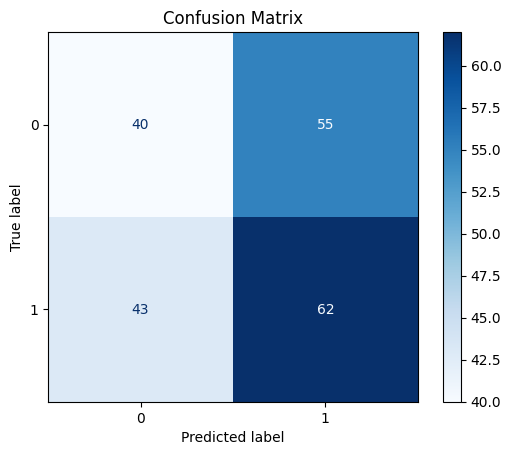

In [8]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay,roc_auc_score, roc_curve,auc,classification_report
from sklearn.model_selection import GridSearchCV
# Convertimos a arrays
y_true = Y_test.numpy()
y_pred = Y_pred_classes.numpy()
# Calculamos la matriz de confusión
conf_matrix = confusion_matrix(y_true,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
# Ploteamos la matriz de confusión
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()


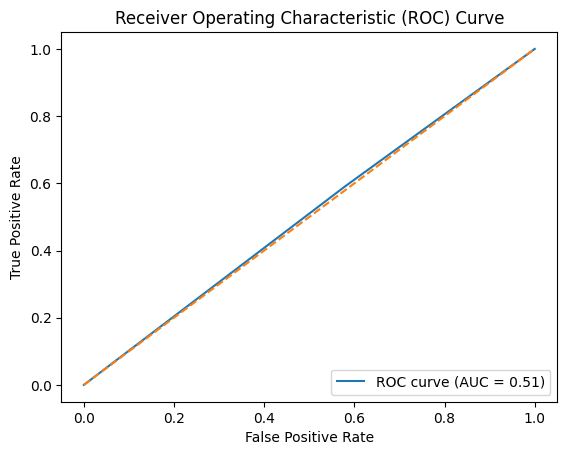

In [9]:
# Convertimos a numpy
y_true = Y_test.numpy()
y_scores = Y_pred_classes.numpy()

#  Calculamos la curva ROC
fpr, tpr, thresholds = roc_curve(y_true, y_scores)
roc_auc = auc(fpr, tpr)

# Ploteamos la curva ROC
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--')  # Diagonal
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [10]:

# Convertir a arrays
y_true = Y_test.numpy()
y_pred = Y_pred_classes.numpy()

# Classification report
report = classification_report(y_true, y_pred)
print("Classification Report:\n")
print(report)

Classification Report:

              precision    recall  f1-score   support

         0.0       0.48      0.42      0.45        95
         1.0       0.53      0.59      0.56       105

    accuracy                           0.51       200
   macro avg       0.51      0.51      0.50       200
weighted avg       0.51      0.51      0.51       200



## Step 6: Model Saving and Loading

In [11]:
# Guardar los pesos del modelo
torch.save(model.state_dict(), "logistic_model.pth")
# Cargamos una nueva instancia del modelo
new_model = LogisticRegressionModel(input_size)
new_model.load_state_dict(torch.load("logistic_model.pth"))
# Evaluamos el modelo cargado
new_model.eval()
with torch.no_grad():
    test_outputs = new_model(X_test)
    test_pred = (test_outputs >= 0.5).float()
    test_accuracy = (test_pred == Y_test).float().mean().item()
print(f"Test Accuracy after loading: {test_accuracy*100:.2f}%")

Test Accuracy after loading: 51.00%


## Step 7: Hyperparameter Tuning

In [12]:
# Definimos el learning rate
learning_rates = [0.01, 0.05, 0.1]
for lr in learning_rates:
    # Por cada iteración reinicializamos el modelo
    opt_model = LogisticRegressionModel(input_size)
    optimizer = torch.optim.SGD(opt_model.parameters(), lr=lr)
    # Repetimos el entrenamiento
    for epoch in range(num_epochs):
        opt_model.train()
        optimizer.zero_grad()
        output = opt_model(X_train)
        loss = criterion(output, Y_train)
        loss.backward()
        optimizer.step()
# Evaluamos el modelo con el nuevo learning rate
    with torch.no_grad():
        opt_model.eval()
        torch.no_grad()
        # Predicciones
        test_output = opt_model(X_test)
        train_output = opt_model(X_train)
        # Umbral de 0.5 para clasificar
        Y_pred_classes = (test_output > 0.5).float()
        Y_train_classes = (train_output > 0.5).float()
        # Calcular la precisión
        test_accuracy = accuracy_score(Y_test, Y_pred_classes)
        train_accuracy = accuracy_score(Y_train, Y_train_classes)
    print(f'Test Accuracy with learning rate {lr}: {test_accuracy:.4f}')
    print(f'Train Accuracy with learning rate {lr}: {train_accuracy:.4f}')




Test Accuracy with learning rate 0.01: 0.5050
Train Accuracy with learning rate 0.01: 0.5450
Test Accuracy with learning rate 0.05: 0.5050
Train Accuracy with learning rate 0.05: 0.5437
Test Accuracy with learning rate 0.1: 0.5050
Train Accuracy with learning rate 0.1: 0.5437


        feature    weight
3   gold_earned  0.175342
0         kills  0.130974
5  wards_placed  0.106087
6  wards_killed -0.034605
7  damage_dealt -0.018873
2       assists -0.013663
4            cs -0.007268
1        deaths -0.005131


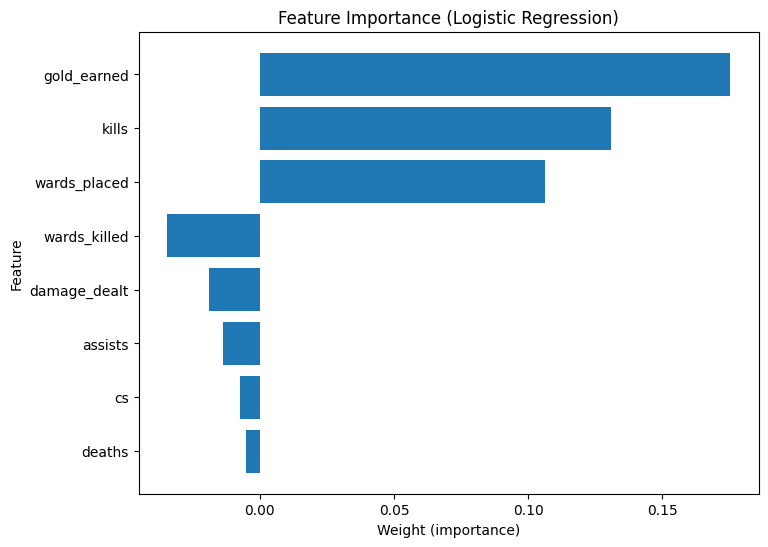

In [13]:
weights = opt_model.linear.weight.data.numpy().flatten()

# 2) Crear DataFrame con nombre y valor de cada peso
feature_importance = pd.DataFrame({
    'feature': X.columns,        # o X_train.columns si usaste pandas
    'weight':  weights
})

# 3) Ordenar por el valor absoluto del peso (más importante arriba)
feature_importance['abs_weight'] = feature_importance['weight'].abs()
feature_importance = feature_importance.sort_values(by='abs_weight', ascending=False)

print(feature_importance[['feature', 'weight']])

# 4) Visualizar
plt.figure(figsize=(8,6))
plt.barh(feature_importance['feature'], feature_importance['weight'])
plt.xlabel("Weight (importance)")
plt.ylabel("Feature")
plt.title("Feature Importance (Logistic Regression)")
plt.gca().invert_yaxis()   # para que la más importante esté arriba
plt.show()